# Projeto de Modelo de Regressão Linear para Previsão de Emissões de Gases do Efeito Estufa por mudanças de cobertura da terra na Amazônia 🌎

Este projeto pessoal tem como objetivo utilizar técnicas de aprendizado de máquina, baseado em regressão linear, para prever as emissões de gases do efeito estufa (GEE) causadas por mudanças de cobertura da terra na Amazônia. Para isso, serão utilizados dados do INPE que relacionam as emissões de CO2 com o desmatamento de terra na região.

O modelo de regressão linear será ajustado com base nos dados disponibilizados, de forma a encontrar uma relação entre as variáveis que permita prever as emissões de GEE a partir do desmatamento. Foi utilizado o Python como linguagem de programação, com a biblioteca Pandas para manipulação dos dados e a biblioteca Scikit-learn para a utilização do modelo de regressão linear.

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

A primeira parte consiste no tratamento de dados, é criado o dataframe `df1` baseado em uma planilha do INPE disponibilizada no <a href="https://dados.gov.br/dados/conjuntos-dados/inpe-em">Portal de Dados Abertos</a> com as colunas "Ano", "d_area" e "co2_1stOrder". A planilha original estava desformatada então foi necessário fazer varios `drops` e `renames`, além de ter sido necessário a adição manual da tabela `co2_1stOrder`. As tabelas utilizadas serão `d_area` (área de desmatamento na Amazônia) e `co2_1stOrder` (CO2 de primeira ordem emitido). Esses dados serão utilizados para ajustar um modelo de regressão linear utilizando o `scikit learn`.

In [105]:
xls = pd.ExcelFile('inpe_EM_BRAmz_results.xlsx')
df1 = pd.read_excel(xls, 'Com degradação')
df1.drop(list(range(40)), axis=0, inplace = True)
df1.drop(df1.columns[5:15], axis=1, inplace = True)
df1.drop(columns=['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4'], axis = 0, inplace = True)
df1.rename(columns={'________________________________________________________________________________________________________' : 'Ano', 'Unnamed: 2' : 'd_area' }, inplace = True)
df1['d_area'] = pd.to_numeric(df1['d_area'])
df1['d_area'] = df1['d_area'] / 100
co2_1stOrder = [748, 601, 751, 812, 812, 1584, 990, 721, 947, 941, 993, 990, 1093, 1301, 1410, 954, 747, 633, 699, 438, 415, 372, 250, 326, 276, 339, 444, 391, 424, 581, 633]
df1['co2_1stOrder'] = co2_1stOrder
df1['co2_1stOrder'] = pd.to_numeric(df1['co2_1stOrder'])

In [106]:
df1

,Ano,d_area,co2_1stOrder
40,1990,13730.00,748
41,1991,11030.00,601
42,1992,13786.00,751
43,1993,14896.00,812
44,1994,14896.00,812
45,1995,29059.00,1584
46,1996,18161.00,990
47,1997,13227.00,721
48,1998,17383.00,947
49,1999,17259.00,941


Agora que temos os dados tratados, foram feitas duas planilhas relacionando a área desmatada na Amazônia e a emissão de CO2 de primeira ordem ao longo dos anos.

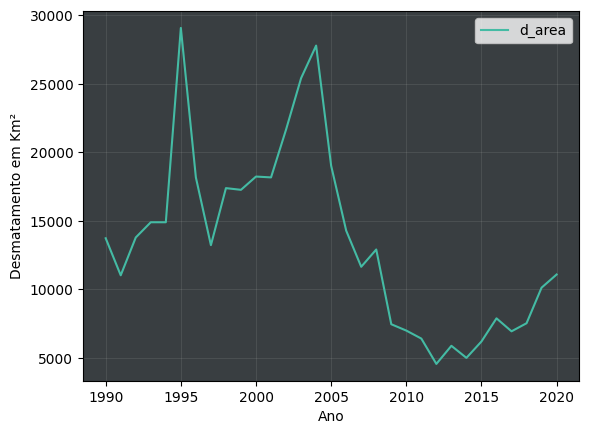

In [107]:
df1.plot(x = 'Ano',y = 'd_area', color = '#44BBA4')
plt.xlabel('Ano')
plt.ylabel('Desmatamento em Km²')
plt.gca().set_facecolor('#393E41')
plt.grid(color='#E7E5DF', alpha = .1, linestyle='solid')

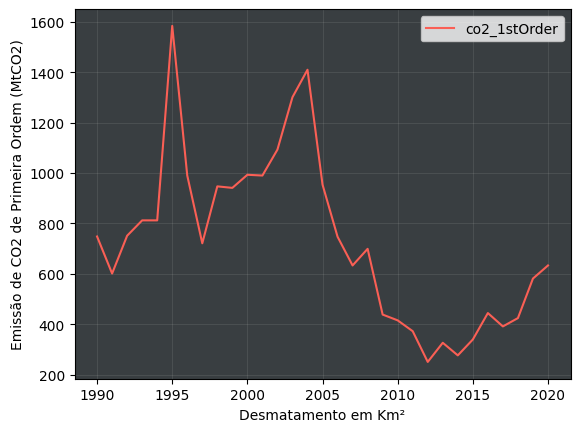

In [108]:
df1.plot(x='Ano', y='co2_1stOrder', color = '#FA5F55')
plt.xlabel('Desmatamento em Km²')
plt.ylabel('Emissão de CO2 de Primeira Ordem (MtCO2)')
plt.gca().set_facecolor('#393E41')
plt.grid(color='#E7E5DF', alpha = .1, linestyle='solid')

A conclusão é óbvia, a emissão de CO2 está intimamente ligada ao desmatamento da região Amazônica. Com isso em mente, agora utilizaremos o modelo de regressão linear para tentar prever a emissâo de CO2 baseada na área desmatada. 

In [109]:
model = LinearRegression()
inputs = df1[['d_area']].values
targets = df1.co2_1stOrder
area = np.array(df1[['d_area']])
real_value = np.array(df1[['co2_1stOrder']])

In [110]:
model.fit(inputs, targets)
model.predict(area)

array([ 741.00810762,  603.4975729 ,  743.86017797,  800.39228669,
        800.39228669, 1521.71143604,  966.67817405,  715.3904043 ,
        927.05476812,  920.73946948,  969.98861285,  966.88189336,
       1144.43244   , 1335.19927692, 1456.16678502, 1010.13048442,
        769.32509181,  635.05980571,  699.29454156,  421.86398198,
        398.25036737,  368.60869837,  274.54181595,  341.76664199,
        297.00136066,  357.85639315,  443.73070349,  395.55770738,
        425.54060623,  557.62660501,  606.45150291])

Com a previsão feita, agora iremos adicionar uma tabela ao `df1` para comparmos nossos resultados com os números reais.

In [112]:
regression = model.predict(area)
df1['Previsão CO2'] = regression.tolist()
df1['Previsão CO2'] = pd.to_numeric(df1['Previsão CO2'])
df1 = df1.astype({"Previsão CO2": int})

df1

,Ano,d_area,co2_1stOrder,Previsão CO2
40,1990,13730.00,748,741
41,1991,11030.00,601,603
42,1992,13786.00,751,743
43,1993,14896.00,812,800
44,1994,14896.00,812,800
45,1995,29059.00,1584,1521
46,1996,18161.00,990,966
47,1997,13227.00,721,715
48,1998,17383.00,947,927
49,1999,17259.00,941,920


Agora vamos medir o desempenho do modelo e o desvio médio por meio da Raiz Do Erro Quadrático Médio

In [129]:
predict = df1['Previsão CO2'].values
real_value = df1['co2_1stOrder'].values

def rmse(real_value, predict):
    return np.sqrt(np.mean(np.square(real_value - predict)))

rmse(real_value, predict)

25.373977017358147

Parece bom! Para se ter uma ideia do que 25 MtCO2 significa, seria o equivalente a aproximadamente 104km percorridos por um carro. Agora vamos colocar em um gráfico a comparação entre as previsões e os dados reais.

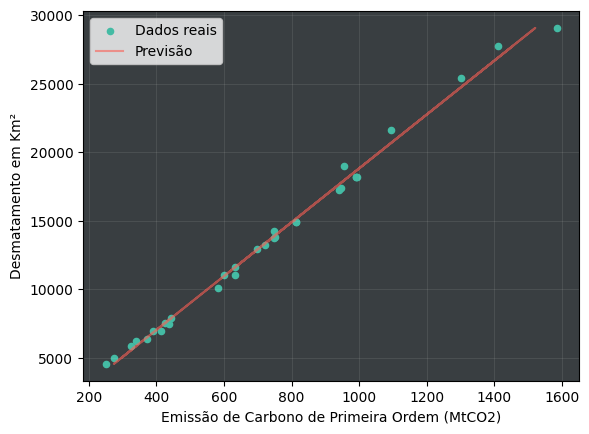

In [114]:
area = df1['d_area']

df1.plot.scatter(x = 'co2_1stOrder', y = 'd_area', color = '#44BBA4')
plt.plot(predict, area, color = '#FA5F55', alpha=0.6)
plt.xlabel('Emissão de Carbono de Primeira Ordem (MtCO2)')
plt.ylabel('Desmatamento em Km²')
plt.gca().set_facecolor('#393E41')
plt.grid(color='#E7E5DF', alpha = .1, linestyle='solid')
plt.legend(['Dados reais', 'Previsão'])

Com tudo isso em mente, faremos um teste final de previsão com dados de desmatamento de 2021 e 2022. A veracidade disso só poderá ser confirmada com a divulgação de dados oficiais do INPE para esses anos.

In [133]:
print(model.predict([[10362]])) #Desmatamento em 2021
print(model.predict([[10573]])) #Desmatamento em 2022

[569.47644801]
[580.22264165]
